# 1 - Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('tvmarketing.csv')

x = data['TV']
y = data['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

Mean Squared Error: 10.204654118800956
Mean Absolute Error: 2.444420003751042
R2 Score: 0.6766954295627076


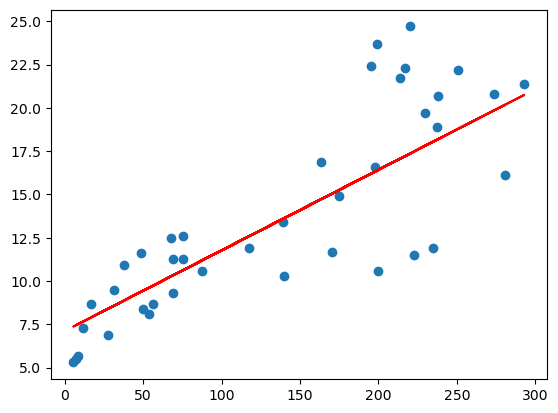

In [3]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

# 2 - Multiple Linear Regression

In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.053172450119903715
Mean Absolute Error: 0.16464520646484526
R2 Score: 0.9270499922135468


# 3 - Logistic Regression

[1 1 1 1 1 1 0 1 0 0 1 1 1]


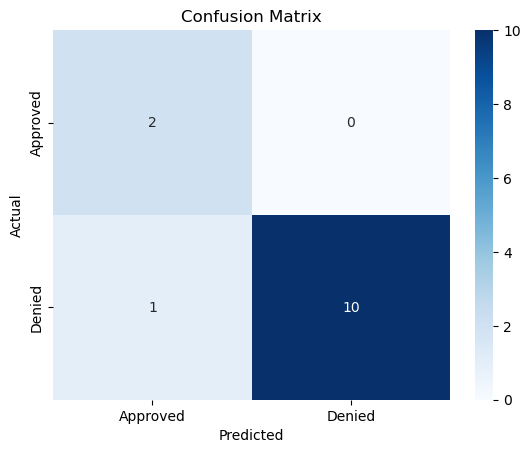

0.9230769230769231
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.91      0.95        11

    accuracy                           0.92        13
   macro avg       0.83      0.95      0.88        13
weighted avg       0.95      0.92      0.93        13



In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('loan.csv')

x = data[['income','credit_score']]
y = data['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Approved', 'Denied'],
                    yticklabels=['Approved', 'Denied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# 6 - Spam Filter

In [31]:
# SPAM Filtering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
data = pd.read_csv('spamfilter.csv')
data['Category'] = data['Category'].map({'ham':0,'spam':1})
data

x_train, x_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size = 0.2)

vect = CountVectorizer()
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

model = MultinomialNB()
model.fit(x_train_vect, y_train)
y_pred = model.predict(x_test_vect)

print(y_pred)
print("Accuracy = ",accuracy_score(y_test, y_pred))

user_input = ["Urgent attention! You have won. Click here"]

user_input_v = vect.transform(user_input)
output = model.predict(user_input_v)

if (output[0] == 1):
    print("SPAM")
else:
    print("HAM")

[0 0 0 ... 0 0 0]
Accuracy =  0.9811659192825112
SPAM


# 7 - Sentiment Analysis

In [20]:
import random
from textblob import TextBlob

texts = [
    "I love this movie, it's fantastic!",
    "The weather is so beautiful today.",
    "I'm feeling great after my morning workout.",
    "This restaurant has amazing food!",
    "I had a wonderful time at the party last night.",
    "Today was a productive day at work.",
    "I'm so excited about my upcoming vacation!",
    "I can't wait to see my friends this weekend.",
    "The book I'm reading is captivating.",
    "I'm feeling inspired to start a new project.",
    "This new song is my favorite!",
    "I'm grateful for all the opportunities in my life.",
    "The sunset was breathtakingly beautiful.",
    "I'm enjoying learning new things every day.",
    "Spending time with family always makes me happy.",
    "I'm feeling optimistic about the future.",
    "The food at this restaurant is terrible.",
    "I'm disappointed with the service here.",
    "I'm frustrated with the traffic.",
    "The customer support was unhelpful and rude.",
    "I'm tired of dealing with this problem.",
    "I'm stressed about my upcoming exams.",
    "I'm feeling overwhelmed with work.",
    "I'm not looking forward to this meeting.",
    "The movie I watched last night was awful.",
    "I'm upset about the recent events.",
    "I'm feeling lonely.",
    "I'm annoyed with all the noise outside.",
    "The delay in the project is frustrating.",
    "I'm worried about the future.",
    "The news is depressing.",
    "I'm feeling anxious about the presentation.",
    "I'm disappointed with myself.",
    "I'm feeling down today.",
    "The loss of my pet has left me heartbroken.",
    "I'm struggling with my mental health.",
    "I'm feeling hopeless.",
    "I'm overwhelmed with grief.",
    "I'm exhausted from all the stress.",
    "I'm feeling isolated.",
    "I'm battling with depression.",
    "I'm feeling defeated.",
    "The constant negativity is draining.",
    "I'm struggling to find motivation.",
    "I'm feeling worthless.",
    "I'm stuck in a rut.",
    "I'm in a dark place right now."
]

for text in texts:
    sentiment = TextBlob(text).sentiment
    if sentiment.polarity > 0:
        print(f"Text: {text}\nSentiment: Positive")
    elif sentiment.polarity < 0:
        print(f"Text: {text}\nSentiment: Negative")
    else:
        print(f"Text: {text}\nSentiment: Neutral")
    print()

Text: I love this movie, it's fantastic!
Sentiment: Positive

Text: The weather is so beautiful today.
Sentiment: Positive

Text: I'm feeling great after my morning workout.
Sentiment: Positive

Text: This restaurant has amazing food!
Sentiment: Positive

Text: I had a wonderful time at the party last night.
Sentiment: Positive

Text: Today was a productive day at work.
Sentiment: Neutral

Text: I'm so excited about my upcoming vacation!
Sentiment: Positive

Text: I can't wait to see my friends this weekend.
Sentiment: Neutral

Text: The book I'm reading is captivating.
Sentiment: Positive

Text: I'm feeling inspired to start a new project.
Sentiment: Positive

Text: This new song is my favorite!
Sentiment: Positive

Text: I'm grateful for all the opportunities in my life.
Sentiment: Neutral

Text: The sunset was breathtakingly beautiful.
Sentiment: Positive

Text: I'm enjoying learning new things every day.
Sentiment: Positive

Text: Spending time with family always makes me happy.
Se

# 8 - Word Cloud

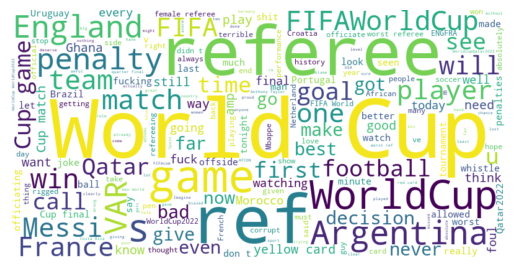

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data = pd.read_csv('https://raw.githubusercontent.com/SuperDataWorld/Python/main/REF%20TWEETS.csv')

text = data['Tweet'].str.cat(sep = ' ')
sample = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."
# text = " ".join(content for content in data.CONTENT)

wc = WordCloud(height= 400, width=800, background_color = 'white').generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
# Sentiment Analysis
data = pd.read_csv('sentianalysis.csv')
data['sentiment'] = data['sentiment'].map({'positive':0, 'negative':1})

x_train, x_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size = 0.2)

vect = CountVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy = ",accuracy_score(y_test, y_pred))

user = ["I'm happy with the service here"]
user = vect.transform(user)
output = model.predict(user)
if (output[0] == 1):
    print("Negative")
else:
    print("Positive")

Accuracy =  0.805
Positive
